# Esame del 28/01/2020
Il datataset trainMobile.csv ([preso da kaggle](https://www.kaggle.com/iabhishekofficial/mobileprice-classification)) contiene dati relativi a telefoni cellulare

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/phone_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Parte 1: Analisi
## 1.1
Quante sono le istanze contenute nel dataset? **2000** Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? **NO** Il dataset è bilanciato per quanto riguarda la classe da predire? **SI**


In [11]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df.groupby("price_range")["blue"].count()

price_range
0    500
1    500
2    500
3    500
Name: blue, dtype: int64

## 1.2
La variabile sc_w assume valori discreti o continui? Analizzare la distribuzione dei valori e
verificare se i telefoni costosi hanno mediamente una dimensione superiore di schermo.
Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia

In [13]:
df['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

<AxesSubplot:>

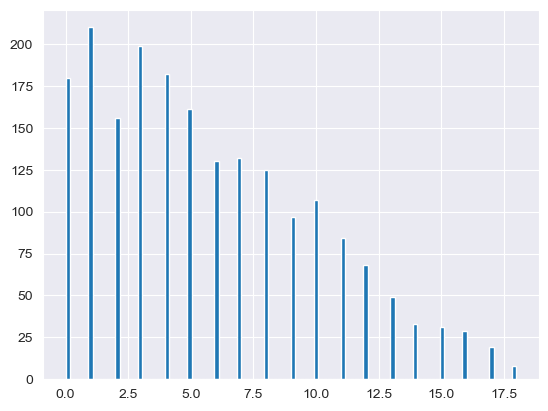

In [14]:
df["sc_w"].hist(bins=100)

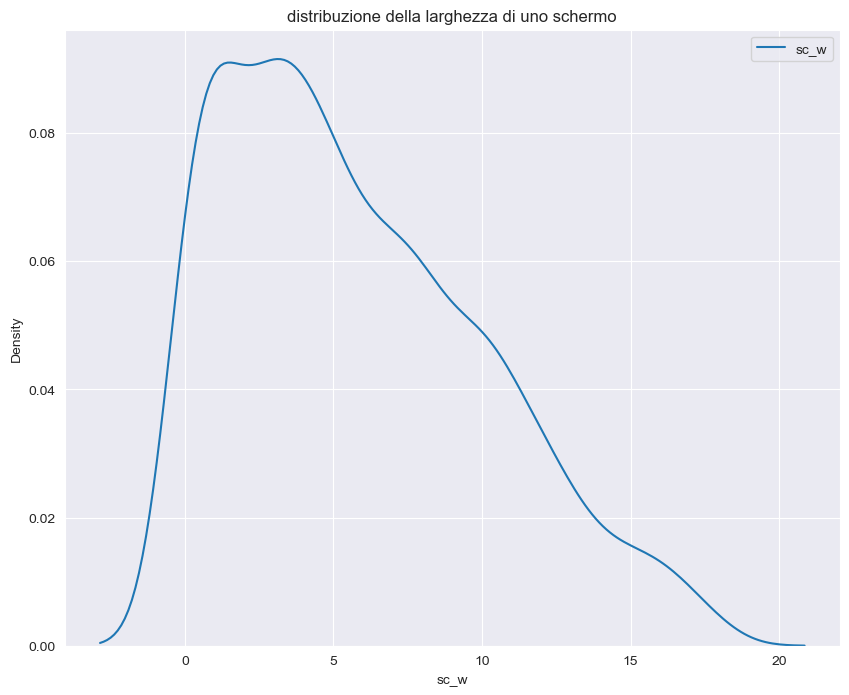

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo")

sns.kdeplot(df["sc_w"],ax=ax1, label ="sc_w")


plt.legend()

<AxesSubplot:>

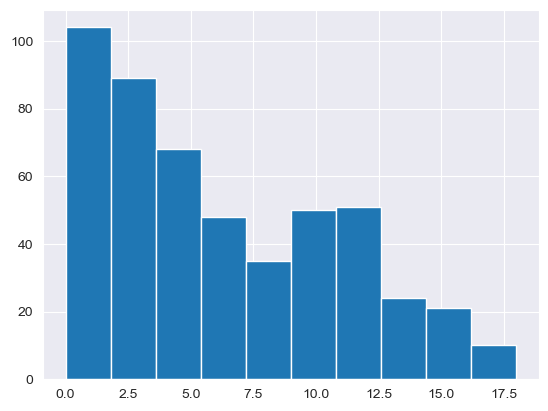

In [16]:
df_length = df.loc[df.price_range == 3]
df_length["sc_w"].hist()

In [18]:
#fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
#ax1.set_title("distribuzione della larghezza di uno schermo in rapporto con il costo")

#sns.barplot(df['price_range'],df["sc_w"],ax=ax1)


In [19]:
df_deleted = df.loc[df.sc_w != 0]
df_deleted

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:>

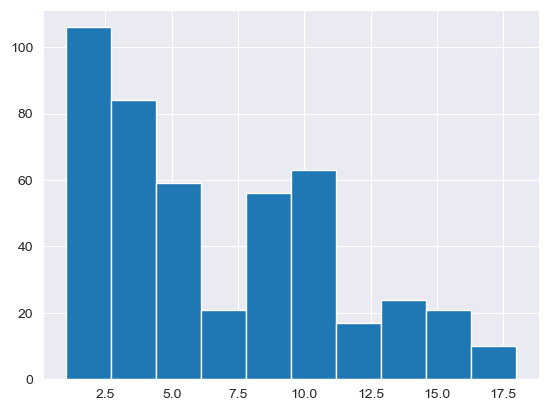

In [24]:
df_deleted_len = df_deleted.loc[df.price_range == 3]
percent = df_deleted_len.groupby("sc_w")["sc_h"].count() / len(df_deleted_len)
df_deleted_len["sc_w"].hist()

In [27]:
percent*100

sc_w
1     14.099783
2      8.893709
3     10.412148
4      7.809111
5      6.941432
6      5.856833
7      4.555315
8      7.592191
9      4.555315
10     6.290672
11     7.375271
12     3.687636
13     2.603037
14     2.603037
15     1.952278
16     2.603037
17     1.735358
18     0.433839
Name: sc_h, dtype: float64

## 1.3
E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente?
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione
dei valori di battery power per ogni categoria

<AxesSubplot:title={'center':'distribuzione della larghezza di uno schermo in rapporto con la durata della  batteria '}, xlabel='battery_power', ylabel='Count'>

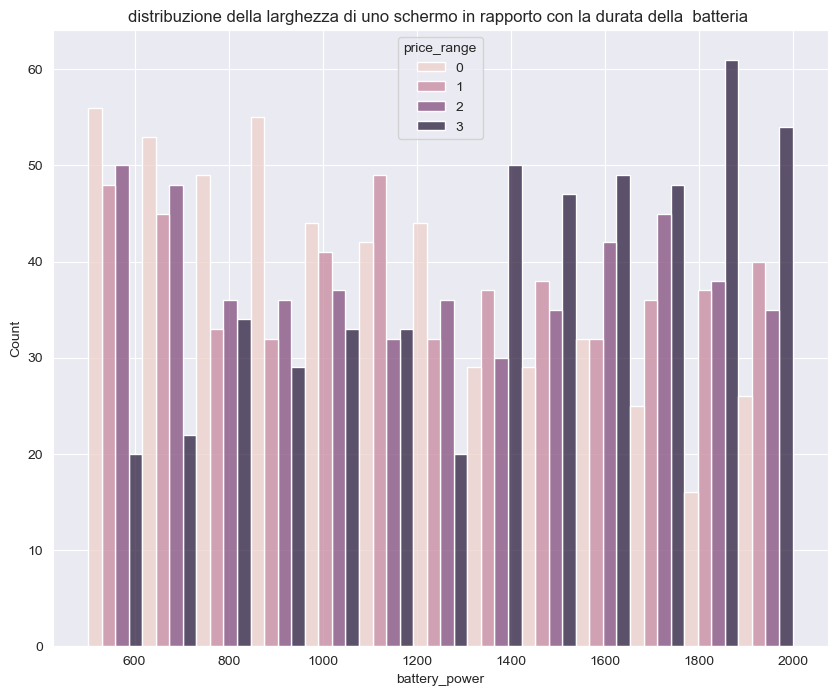

In [32]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo in rapporto con la durata della  batteria ")

sns.histplot(data=df, x='battery_power',hue='price_range',multiple='dodge')



## 1.4
Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G
 Risposta = SI

In [34]:
g_4 = df.loc[df.four_g == 1]
g_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [36]:
g_4.groupby("three_g")["blue"].count()

three_g
1    1043
Name: blue, dtype: int64

## 1.5
Quanti sono i telefoni 4G che non hanno wifi e bluetooth?
263

In [37]:
g_4.loc[(g_4.wifi == 0) & (g_4.blue == 0)].shape[0]

263

# Parte 2: Trasformazione e Predizione
## 2.1
 Si vuole predire il valore di price_range sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test”

In [41]:
new_df = df.copy()
y = new_df.price_range

new_df.drop("price_range",axis=1,inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df,y,test_size=1/4,random_state=0)

train = X_train.assign(price=y_train)
test = X_test.assign(price=y_test)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
1045,531,0,1.1,0,10,0,63,0.7,189,7,...,145,1903,2958,17,1,19,0,1,0,2
937,764,1,1.2,1,1,0,13,1.0,152,8,...,361,511,3148,18,7,6,1,1,0,2
1658,1812,1,1.3,1,4,1,42,1.0,162,7,...,380,1550,3338,18,13,11,1,1,1,3
529,1821,0,0.9,0,9,1,12,0.3,114,1,...,97,1803,2430,7,4,6,1,1,1,2
895,1790,1,2.3,1,3,1,49,0.5,100,3,...,396,1980,3568,6,2,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,...,522,563,3796,10,5,13,1,1,0,3
1216,1158,0,0.7,1,1,1,29,0.7,123,2,...,311,1796,1542,17,9,15,1,0,1,1
1653,1190,0,2.0,1,0,0,40,0.2,93,5,...,1399,1646,3610,13,7,9,0,0,1,3
559,1191,0,2.4,1,2,0,13,0.9,169,1,...,179,1813,1028,14,6,8,1,1,1,0



Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = model.predict(train_data)
    test_preds = model.predict(test_data)
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))


In [47]:
classifiers = [DecisionTreeClassifier(), LogisticRegression()]
names = ["DT","LR"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== DT =====
Accuracy on train 1.0
Accuracy on test 0.814
Confusion matrix on test
[[115   9   0   0]
 [  8  85  17   0]
 [  0  17  84  24]
 [  0   1  17 123]]
 ===== LR =====
Accuracy on train 0.6326666666666667
Accuracy on test 0.65
Confusion matrix on test
[[104  18   2   0]
 [ 17  63  25   5]
 [  0  33  58  34]
 [  0   2  39 100]]


## Considerazioni:
- Il DT presenta un po di overfitting nella fase di train, e trova piú difficile predire le fasce dei telefoni più alti
- Il LR predice peggio, soprattuto le classi dei telefoni 2 e 1

## 2.2
 Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un
una 10 Fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score

for model,name in zip(classifiers,names):
    scores = cross_val_score(model, new_df,y, cv=5)
    print(f"Accuracy of {name} is: ",scores.mean())
    print(scores)

Accuracy of DT is:  0.8305
[0.8375 0.82   0.815  0.83   0.85  ]
Accuracy of LR is:  0.6359999999999999
[0.63   0.6525 0.6425 0.63   0.625 ]


<AxesSubplot:>

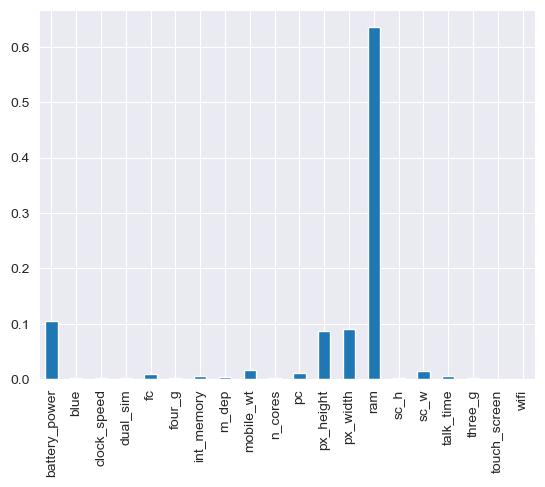

In [50]:
import matplotlib.pyplot as plt

importanza = classifiers[0].feature_importances_
std = np.std([classifiers[0].feature_importances_],axis=0)
DF_importanza = pd.Series(importanza,index=classifiers[0].feature_names_in_)
fig,ax = plt.subplots()
DF_importanza.plot.bar(yerr=std,ax=ax)

## 2.3
Utilizzare la funzione di gridSearchCV per trovare i parametri migliori del classificatore
decision tree. Agire sui parametri criterion, max_features e min_samples_split. Vericare se
l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al
punto 1

In [61]:
from sklearn.model_selection import GridSearchCV
model_dt = classifiers[0]
params = {'criterion':('gini','entropy','log_loss'),'max_features':('auto','sqrt','log2'),'min_samples_split':[2,3,1]}
grid_model = GridSearchCV(model_dt,params,cv=10)

test_model("GridSearch of DT",grid_model, X_train, X_test, y_train, y_test)

 ===== GridSearch of DT =====
Accuracy on train 1.0
Accuracy on test 0.718
Confusion matrix on test
[[102  21   1   0]
 [ 25  66  18   1]
 [  1  23  87  14]
 [  0   0  37 104]]


In [62]:
grid_model.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2}

In [66]:
model_dt.set_params(**grid_model.best_params_)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [67]:
test_model("DT with best params of GS",model_dt, X_train, X_test, y_train, y_test)

 ===== DT with best params of GS =====
Accuracy on train 1.0
Accuracy on test 0.504
Confusion matrix on test
[[81 31  9  3]
 [25 49 24 12]
 [ 9 36 42 38]
 [15 14 32 80]]


<AxesSubplot:>

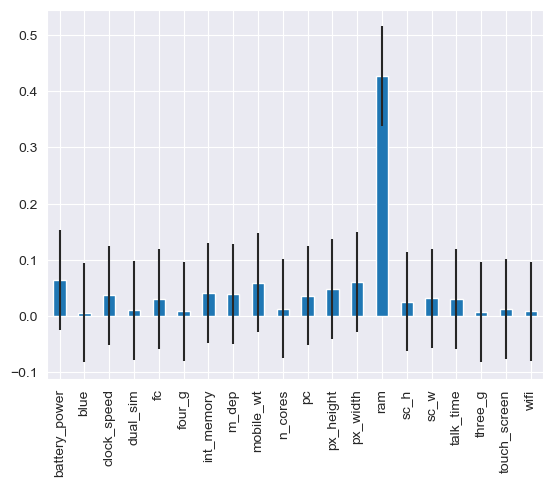

In [69]:
importanza = model_dt.feature_importances_
std = np.std(model_dt.feature_importances_, axis=0)
DF_importanza = pd.Series(importanza,index=model_dt.feature_names_in_)
fig,ax = plt.subplots()
DF_importanza.plot.bar(yerr=std,ax=ax)

## 2.4
Utilizzare la funzione MaxAbsScaler per scalare i valori del dataset tra 0 e 1 e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora

In [68]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_df = new_df.copy()
scaled_df = scaler.fit_transform(scaled_df)
scaled_df

array([[0.42142142, 0.        , 0.73333333, ..., 0.        , 0.        ,
        1.        ],
       [0.51101101, 1.        , 0.16666667, ..., 1.        , 1.        ,
        0.        ],
       [0.28178178, 1.        , 0.16666667, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.95645646, 0.        , 0.3       , ..., 1.        , 1.        ,
        0.        ],
       [0.75675676, 0.        , 0.3       , ..., 1.        , 1.        ,
        1.        ],
       [0.25525526, 1.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.25,random_state=0)

model_dt = DecisionTreeClassifier()
test_model("DT  with scaled dataset",model_dt, X_train, X_test, y_train, y_test)

 ===== DT  with scaled dataset =====
Accuracy on train 1.0
Accuracy on test 0.798
Confusion matrix on test
[[110  14   0   0]
 [  8  82  20   0]
 [  0  15  86  24]
 [  0   0  20 121]]


## 2.5
Discretizzare il valore di ram in 4 intervalli e verificare se l’accuratezza ottenuta con il
Decision Tree Classifier migliora

In [72]:
df["ram"]

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [73]:
from sklearn.preprocessing import KBinsDiscretizer
ram_in_df = pd.DataFrame(new_df['ram'])

kbin = KBinsDiscretizer(n_bins=4,encode='ordinal')
kbin.fit(ram_in_df)


df_changed = new_df.copy()
df_changed['ram'] =  kbin.transform(ram_in_df)
df_changed

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2.0,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2.0,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2.0,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2.0,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1.0,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,0.0,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,1.0,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,2.0,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,0.0,18,10,19,1,1,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_changed,y,test_size=0.25,random_state=0)


model_dt = DecisionTreeClassifier()
test_model("DT  with scaled dataset", model_dt, X_train, X_test, y_train, y_test)

 ===== DT  with scaled dataset =====
Accuracy on train 1.0
Accuracy on test 0.734
Confusion matrix on test
[[109  15   0   0]
 [ 15  71  23   1]
 [  0  29  75  21]
 [  0   0  29 112]]


## 2.6
 Creare una pipeline in cui il valore di ram sia discretizzato in 4 intervalli, il valore di
battery_power sia discretizzato in 10 intervalli e poi il dataset venga ricondotto a valori
nell’intervallo (0,1) e normalizzato con la funzione Normalizer. Si applichi poi un modello
DecisionTree. [Alternativa: non applicare la discretizzazione]

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocess_columns = ColumnTransformer(
    transformers=[('ram_bin',KBinsDiscretizer(n_bins=4,encode='ordinal'),["ram"]),
                  ('battery_bin',KBinsDiscretizer(n_bins=10,encode='ordinal'),['battery_power'])],remainder="passthrough"
)
preprocess_columns

ColumnTransformer(remainder='passthrough',
                  transformers=[('ram_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=4),
                                 ['ram']),
                                ('battery_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['battery_power'])])

In [86]:
new_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [85]:
verify = preprocess_columns.fit_transform(new_df)
verify

array([[2.        , 2.        , 0.        , ..., 0.        , 0.        ,
        0.48280475],
       [2.        , 3.        , 0.3323995 , ..., 0.3323995 , 0.3323995 ,
        0.        ],
       [2.        , 0.        , 0.33391991, ..., 0.33391991, 0.33391991,
        0.        ],
       ...,
       [2.        , 9.        , 0.        , ..., 0.36844094, 0.36844094,
        0.        ],
       [0.        , 6.        , 0.        , ..., 0.35600583, 0.35600583,
        0.35600583],
       [3.        , 0.        , 0.30166627, ..., 0.30166627, 0.30166627,
        0.30166627]])

In [78]:
from sklearn.preprocessing import Normalizer
preprocess_trasform = Pipeline(steps=[
                ('scale_01',MaxAbsScaler()),
                ('norma',Normalizer())
])

In [81]:
model_dt = DecisionTreeClassifier()
my_pipeline = Pipeline(steps=[('preprocessor_columns', preprocess_columns),
                              ('preprocessor_trasform', preprocess_trasform),
                              ('model_dt', model_dt)],verbose=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(new_df,y,test_size=1/4,random_state=0)

test_model("Pipeline ", my_pipeline, X_train, X_test, y_train, y_test)

[Pipeline]  (step 1 of 3) Processing preprocessor_columns, total=   0.0s
[Pipeline]  (step 2 of 3) Processing preprocessor_trasform, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing model_dt, total=   0.0s
 ===== Pipeline  =====
Accuracy on train 1.0
Accuracy on test 0.73
Confusion matrix on test
[[106  18   0   0]
 [ 14  69  25   2]
 [  0  25  78  22]
 [  0   3  26 112]]


### Extra: invece di fare il bin e poi scalare e normalizzare tutti i valori, faccio lo scale e il norma solo a i valori che non rientrano nel ColumnTrasform

In [84]:
preprocess_trasform = Pipeline(steps=[
    ('scale_01',MaxAbsScaler()),
    ('norma',Normalizer())
])

preprocess_columns = ColumnTransformer(
    transformers=[('ram_bin',KBinsDiscretizer(n_bins=4,encode='ordinal'),["ram"]),
                  ('battery_bin',KBinsDiscretizer(n_bins=10,encode='ordinal'),['battery_power'])],remainder=preprocess_trasform
)
preprocess_columns

ColumnTransformer(remainder=Pipeline(steps=[('scale_01', MaxAbsScaler()),
                                            ('norma', Normalizer())]),
                  transformers=[('ram_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=4),
                                 ['ram']),
                                ('battery_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['battery_power'])])

In [87]:
verify = preprocess_columns.fit_transform(new_df)
verify

array([[2.        , 2.        , 0.        , ..., 0.        , 0.        ,
        0.48280475],
       [2.        , 3.        , 0.3323995 , ..., 0.3323995 , 0.3323995 ,
        0.        ],
       [2.        , 0.        , 0.33391991, ..., 0.33391991, 0.33391991,
        0.        ],
       ...,
       [2.        , 9.        , 0.        , ..., 0.36844094, 0.36844094,
        0.        ],
       [0.        , 6.        , 0.        , ..., 0.35600583, 0.35600583,
        0.35600583],
       [3.        , 0.        , 0.30166627, ..., 0.30166627, 0.30166627,
        0.30166627]])

In [88]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocess_columns),
                              ('model_dt', model_dt)],verbose=True)

X_train, X_test, y_train, y_test = train_test_split(new_df,y,test_size=1/4,random_state=0)

test_model("Pipeline ", my_pipeline, X_train, X_test, y_train, y_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing model_dt, total=   0.0s
 ===== Pipeline  =====
Accuracy on train 1.0
Accuracy on test 0.738
Confusion matrix on test
[[102  20   2   0]
 [ 20  74  16   0]
 [  0  22  78  25]
 [  0   1  25 115]]
